In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics as mtcs
import sklearn.preprocessing as pp
import sklearn.linear_model as lm
import sklearn.ensemble as ens

%matplotlib inline

# Data uploading&preview

In [3]:
data = _data_ = pd.read_csv('./data/train.csv')

data

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523,y
0,37.977273,6.758452,3.636364,10.792929,160.801682,151.109783,1.791689,6.818675,8.138413,8.270161,...,5.658393,4.151040,4.540632,4.953183,5.351562,5.311048,5.560922,5.643015,5.715999,0.0
1,19.408163,5.933978,2.816327,5.877551,162.949911,76.153796,1.381401,6.002651,5.080499,7.514421,...,4.830811,3.817712,4.123094,4.426343,4.823804,4.652173,4.795274,4.860781,5.001426,0.0
2,40.265306,7.425645,3.734694,13.160998,172.099640,161.790879,1.603976,7.410120,10.114794,8.805738,...,6.397659,4.223177,4.685597,5.116870,5.333926,5.504569,5.797956,6.009581,6.200889,0.0
3,43.976744,7.648293,3.837209,14.392765,168.885456,175.277251,1.622298,7.629033,12.180817,9.070719,...,5.879135,4.280132,4.563045,5.007714,5.159773,5.393628,5.640132,5.472271,5.741399,0.0
4,24.320988,6.534011,3.567901,8.913580,163.076959,96.019681,1.380679,6.566695,4.417010,8.058783,...,8.148663,4.624973,5.173321,5.720312,6.259342,6.626469,7.062406,7.472998,7.829842,0.0
5,20.924051,6.134299,3.037975,6.506329,165.707039,82.761541,1.381957,6.187547,4.684599,7.660347,...,6.087556,4.430817,4.820282,5.183187,5.595176,5.489454,5.604998,5.847522,5.987080,0.0
6,34.150000,6.740695,3.733333,10.214815,164.252922,135.639059,1.620887,6.781702,8.631090,8.248393,...,6.198225,4.471639,4.801970,5.237107,5.493833,5.573816,5.764799,5.865760,5.998937,0.0
7,23.833333,6.395508,3.141026,8.717949,163.221967,94.106131,1.435936,6.443753,5.834402,7.904135,...,6.582328,4.600158,5.032071,5.499726,5.978728,5.995208,6.179952,6.364051,6.481290,0.0
8,32.380952,6.152543,2.857143,6.402116,164.380868,128.391104,1.687697,6.232890,4.476844,7.736528,...,0.000000,3.449988,3.865979,4.506730,4.765906,4.965028,3.840795,3.595598,0.000000,0.0
9,45.228571,6.608449,3.714286,9.180952,159.167580,180.141749,1.981354,6.690537,8.428546,8.221041,...,5.214936,3.828641,4.234107,4.682131,4.890349,5.192957,5.342334,5.402677,5.303305,0.0


[ 0.  1.]


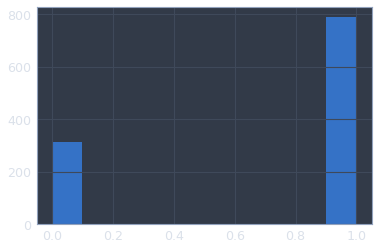

In [4]:
print(data.y.unique())
plt.hist(data.y);

In [5]:
print(data.isnull().sum().sum())

num_1 = data[data.y == 1].shape[0] 
num_0 = data[data.y == 0].shape[0]

print(num_1, num_0, num_1 / (num_0 + num_1))

0
790 315 0.7149321266968326


# Common functions

In [6]:
def weight_init(name, shape):
    return tf.get_variable(name, initializer=tf.random_normal(shape=shape,
                                                              stddev=0.1))
def bias_init(name, shape):
    return tf.get_variable(name, initializer=tf.constant(0.1, shape=shape))

def elastic_net(x, l1, l2):
    return l1 * ( (1-l2) / 2 * tf.norm(x, 2) ** 2 + 
                   l2 * tf.norm(x, 1))

def batch_data(*matrxs, batch_size):
    for batch_i in range(matrxs[0].shape[0] // batch_size):
        yield tuple(x.iloc[batch_i * batch_size : (batch_i + 1) * batch_size] 
                     for x in matrxs)
        
def split_data(data, train_size=0.5, test_size=0.25, validate_size=0.25):
    train_data, test_val_data = ms.train_test_split(data, train_size=train_size)
    test_data, val_data = ms.train_test_split(test_val_data,
                                              train_size=test_size / (test_size+validate_size))
    
    train_X, train_y = train_data.drop('y', axis=1), train_data[['y']]
    test_X, test_y = test_data.drop('y', axis=1), test_data[['y']]
    validate_X, validate_y = val_data.drop('y', axis=1), val_data[['y']]
    
    return (train_X, train_y, test_X, test_y, validate_X, validate_y)

def pp_pipeline(data):
    scaler = pp.StandardScaler()
    
    data_pp = scaler.fit_transform(data)
    
    data_pp = pd.DataFrame(data_pp,
                        index=data.index,
                        columns=data.columns)
    
    #restore target
    data_pp.y = data.y
    
    return data_pp

# Feature selection

## DFS

In [7]:
class DFS:
    def __init__(self, layers_sizes, batch_size=32, lambda1=1e-3, lambda2=1.,
                 alpha1=1e-3, alpha2=0.):
        self.layers_sizes = layers_sizes
        self.num_layers = len(layers_sizes)
        self.batch_size = batch_size
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        
        
    def fit(self, X, y, num_epochs=10, test_data=None):
        self._build_graph_(X.shape[1])
        self.features = X.columns #Persisting for `select_most_important_ftrs`
        self.sess = tf.Session()
        
        self.sess.run(tf.global_variables_initializer())
        
        for epoch_i in range(num_epochs):
            X_cur = X.sample(frac=1, random_state=epoch_i)
            y_cur = y.sample(frac=1, random_state=epoch_i)
            epoch_loss = 0
            for batch_X, batch_y in batch_data(X_cur, y_cur, 
                                               batch_size=self.batch_size):
                train_loss, _ = self.sess.run([self.total_loss, self.train_step],
                                               feed_dict = {self.x: batch_X,
                                                            self.y: batch_y})
                epoch_loss += train_loss
            epoch_loss /= X.shape[0] // self.batch_size
            
            train_predict = self.predict(X_cur)
            train_accuracy = mtcs.accuracy_score(y_cur, train_predict)
            if test_data is not None:
                test_X, test_y = test_data
                test_predict = self.predict(test_X)
                test_accuracy = mtcs.accuracy_score(test_y, test_predict)
                print(f"==> Epoch: {epoch_i}. Train loss: {epoch_loss}."
                      f"Train accuracy: {train_accuracy}. Test accuracy: {test_accuracy}.")
            else:
                print(f"==> Epoch: {epoch_i}. Train loss: {epoch_loss}. "
                      f"Train accuracy: {train_accuracy}.")
       
    
    def predict_proba(self, X):
        predictions_proba = self.sess.run(self.predictions, feed_dict={self.x: X})
        
        return predictions_proba
    
    
    def predict(self, X):
        predictions_proba = self.predict_proba(X)
        
        return list(map(np.argmax, predictions_proba))
    
    
    def get_features_weights(self):
        weights = self.sess.run(self.features_weights)
        
        return weights
    
    
    def select_most_important_ftrs(self, features, N):
        weights = self.get_features_weights()
        feature_weight = sorted(zip(weights, features), 
                                key=lambda x: abs(x[0]))
        
        return map(lambda x: x[1], feature_weight[-N:])
        
        
    def _build_graph_(self, num_features):
        tf.reset_default_graph()
        
        ###Placeholders 
        x = tf.placeholder(tf.float32, [None, num_features], 'x_ph')
        y = tf.placeholder(tf.int32, [None], 'y_ph')
        
        ###Weights initialization
        w = tf.get_variable("dfs_features_weight", 
                            initializer = tf.constant(1., shape=[num_features]))
        self.layers_sizes = [num_features] + self.layers_sizes
        W, b = [], []
        for layer_i in range(self.num_layers):
            W.append(weight_init(f"layer_{layer_i}_weights",
                                 shape=[self.layers_sizes[layer_i],
                                        self.layers_sizes[layer_i+1]]))
            b.append(bias_init(f"layer_{layer_i}_bias",
                               shape=[self.layers_sizes[layer_i+1]]))
        
        ###Input transformations
        logits = x * w #feature selection
        for layer_i in range(self.num_layers):
            if layer_i != self.num_layers - 1:
                logits = tf.nn.tanh(tf.matmul(logits, W[layer_i]) + b[layer_i])
            else:
                logits = tf.matmul(logits, W[layer_i]) + b[layer_i]
        predictions = tf.nn.softmax(logits)
            
        ###Loss calculation
        logloss = tf.reduce_sum(
                        tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, 
                                                                       logits=logits))
        w_loss = elastic_net(w, self.lambda1, self.lambda2)
        W_loss = tf.reduce_sum([elastic_net(W_i, self.alpha1, self.alpha2) for W_i in W])
        
        total_loss = tf.reduce_sum(logloss + w_loss + W_loss)
        
        ###Optimizer
        train_step = tf.train.AdamOptimizer(0.001).minimize(total_loss)
        
        self.x = x
        self.y = y
        self.predictions = predictions
        self.total_loss = total_loss
        self.train_step = train_step
        self.features_weights = w
        

In [8]:
data = pp_pipeline(_data_)

(train_X, train_y,
 test_X, test_y,
 validate_X, validate_y) = split_data(data)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [38]:
dfs = DFS([128, 64, 2])

dfs.fit(train_X, train_y['y'], num_epochs=500, test_data=(test_X, test_y))

==> Epoch: 0. Train loss: 18.631548040053424.Train accuracy: 0.8876811594202898. Test accuracy: 0.8152173913043478.
==> Epoch: 1. Train loss: 11.625561153187471.Train accuracy: 0.9492753623188406. Test accuracy: 0.8369565217391305.
==> Epoch: 2. Train loss: 8.371415194343118.Train accuracy: 0.9710144927536232. Test accuracy: 0.855072463768116.
==> Epoch: 3. Train loss: 6.179288415347829.Train accuracy: 0.9891304347826086. Test accuracy: 0.8478260869565217.
==> Epoch: 4. Train loss: 4.687725824468276.Train accuracy: 0.9927536231884058. Test accuracy: 0.8478260869565217.
==> Epoch: 5. Train loss: 3.9291446068707634.Train accuracy: 0.9927536231884058. Test accuracy: 0.855072463768116.
==> Epoch: 6. Train loss: 3.2915194455315087.Train accuracy: 0.9981884057971014. Test accuracy: 0.8478260869565217.
==> Epoch: 7. Train loss: 3.0706697071299835.Train accuracy: 0.9981884057971014. Test accuracy: 0.8478260869565217.
==> Epoch: 8. Train loss: 2.8810760554145363.Train accuracy: 1.0. Test accura

==> Epoch: 78. Train loss: 1.9459743149140303.Train accuracy: 1.0. Test accuracy: 0.8405797101449275.
==> Epoch: 79. Train loss: 1.9384793604121489.Train accuracy: 1.0. Test accuracy: 0.8405797101449275.
==> Epoch: 80. Train loss: 1.931036346098956.Train accuracy: 1.0. Test accuracy: 0.8405797101449275.
==> Epoch: 81. Train loss: 1.923534126842723.Train accuracy: 1.0. Test accuracy: 0.8369565217391305.
==> Epoch: 82. Train loss: 1.9159379776786356.Train accuracy: 1.0. Test accuracy: 0.8369565217391305.
==> Epoch: 83. Train loss: 1.9084740105797262.Train accuracy: 1.0. Test accuracy: 0.8405797101449275.
==> Epoch: 84. Train loss: 1.9007664989022648.Train accuracy: 1.0. Test accuracy: 0.8369565217391305.
==> Epoch: 85. Train loss: 1.8931103734409107.Train accuracy: 1.0. Test accuracy: 0.8369565217391305.
==> Epoch: 86. Train loss: 1.8854799901737886.Train accuracy: 1.0. Test accuracy: 0.8369565217391305.
==> Epoch: 87. Train loss: 1.877676816547618.Train accuracy: 1.0. Test accuracy: 0.8

==> Epoch: 158. Train loss: 1.265490223379696.Train accuracy: 1.0. Test accuracy: 0.8514492753623188.
==> Epoch: 159. Train loss: 1.2560432167614208.Train accuracy: 1.0. Test accuracy: 0.8514492753623188.
==> Epoch: 160. Train loss: 1.2466292661779068.Train accuracy: 1.0. Test accuracy: 0.8514492753623188.
==> Epoch: 161. Train loss: 1.2370232554043041.Train accuracy: 1.0. Test accuracy: 0.8514492753623188.
==> Epoch: 162. Train loss: 1.2276179860619938.Train accuracy: 1.0. Test accuracy: 0.8514492753623188.
==> Epoch: 163. Train loss: 1.2180299899157356.Train accuracy: 1.0. Test accuracy: 0.855072463768116.
==> Epoch: 164. Train loss: 1.2085862720713896.Train accuracy: 1.0. Test accuracy: 0.8514492753623188.
==> Epoch: 165. Train loss: 1.1989108955158907.Train accuracy: 1.0. Test accuracy: 0.8514492753623188.
==> Epoch: 166. Train loss: 1.1893729392219992.Train accuracy: 1.0. Test accuracy: 0.855072463768116.
==> Epoch: 167. Train loss: 1.1798295133254106.Train accuracy: 1.0. Test acc

==> Epoch: 238. Train loss: 0.868712256936466.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 239. Train loss: 0.866637250956367.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 240. Train loss: 0.8648386983310475.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 241. Train loss: 0.8631009108879987.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 242. Train loss: 0.8610959228347329.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 243. Train loss: 0.859296483152053.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 244. Train loss: 0.8573977491434883.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 245. Train loss: 0.8555521509226631.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 246. Train loss: 0.8536995228599099.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 247. Train loss: 0.851829493747038.Train accuracy: 1.0. Test accu

==> Epoch: 318. Train loss: 0.7045312944580527.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 319. Train loss: 0.7021699723075417.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 320. Train loss: 0.6998022198677063.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 321. Train loss: 0.697404987671796.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 322. Train loss: 0.6948085041607127.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 323. Train loss: 0.6924702314769521.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 324. Train loss: 0.6901316818069009.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 325. Train loss: 0.6875080290962668.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 326. Train loss: 0.6852754003861371.Train accuracy: 1.0. Test accuracy: 0.8695652173913043.
==> Epoch: 327. Train loss: 0.6827896482804242.Train accuracy: 1.0. Test a

==> Epoch: 398. Train loss: 0.48307785041192.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 399. Train loss: 0.48010289493729086.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 400. Train loss: 0.47702551764600415.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 401. Train loss: 0.47403975269373727.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 402. Train loss: 0.4708344743532293.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 403. Train loss: 0.4679476706420674.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 404. Train loss: 0.4650034027941087.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 405. Train loss: 0.4617481126504786.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 406. Train loss: 0.4587284273961011.Train accuracy: 1.0. Test accuracy: 0.8768115942028986.
==> Epoch: 407. Train loss: 0.45562292547786937.Train accuracy: 1.0. Tes

==> Epoch: 478. Train loss: 0.3761022949919981.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 479. Train loss: 0.3748134812887977.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 480. Train loss: 0.37381013176020456.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 481. Train loss: 0.3726359027273515.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 482. Train loss: 0.3714418411254883.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 483. Train loss: 0.37028612284099355.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 484. Train loss: 0.3693501493510078.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 485. Train loss: 0.36829930368591757.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 486. Train loss: 0.3670301086762372.Train accuracy: 1.0. Test accuracy: 0.8659420289855072.
==> Epoch: 487. Train loss: 0.3660469458383672.Train accuracy: 1.0. Te

(array([ 795.,  212.,  172.,  138.,   98.,   65.,   32.,    6.,    3.,    3.]),
 array([-0.0353074 ,  0.06684053,  0.16898846,  0.27113639,  0.37328432,
         0.47543225,  0.57758018,  0.67972811,  0.78187604,  0.88402397,
         0.9861719 ]),
 <a list of 10 Patch objects>)

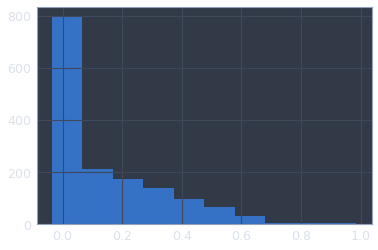

In [39]:
plt.hist(dfs.get_features_weights())

## Lasso

In [40]:
def select_most_important_ftrs(est, features, N):
    feature_weight = sorted(zip(est.coef_[0], features),
                            key=lambda x: abs(x[0]))
    
    return list(map(lambda x: x[1], feature_weight[-N:]))

In [37]:
est = lm.LogisticRegression(penalty='l1')

est.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
mtcs.accuracy_score(test_y, est.predict(test_X))

0.84057971014492749

(array([  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   6.00000000e+00,   2.10000000e+01,
          1.42300000e+03,   5.20000000e+01,   1.40000000e+01,
          4.00000000e+00]),
 array([-2.09498806, -1.7910745 , -1.48716093, -1.18324737, -0.8793338 ,
        -0.57542024, -0.27150668,  0.03240689,  0.33632045,  0.64023402,
         0.94414758]),
 <a list of 10 Patch objects>)

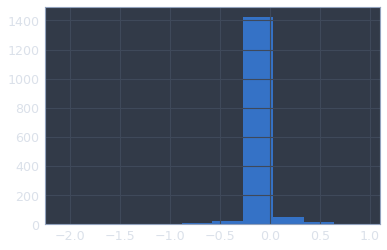

In [20]:
plt.hist(est.coef_[0])

## Random forest

In [43]:
est = ens.RandomForestClassifier()

est.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
mtcs.accuracy_score(test_y, est.predict(test_X))

0.84420289855072461

(array([ 1418.,    57.,    21.,     9.,     4.,     6.,     2.,     2.,
            2.,     3.]),
 array([ 0.        ,  0.00257219,  0.00514438,  0.00771656,  0.01028875,
         0.01286094,  0.01543313,  0.01800531,  0.0205775 ,  0.02314969,
         0.02572188]),
 <a list of 10 Patch objects>)

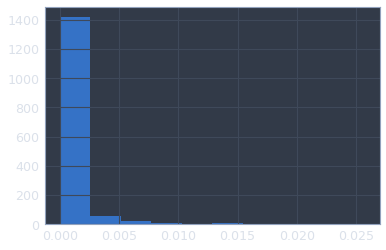

In [46]:
plt.hist(est.feature_importances_)